In [1]:
# import package
import pandas as pd
import math
import numpy as np
import statsmodels.api as sm
from scipy import stats
import statistics
import plotly.graph_objects as go
from scipy.stats import norm
from plotly.subplots import make_subplots
from sklearn.neighbors import KernelDensity

# Law of Large Number
## EXERCICE 1

In [17]:
uni_sim = np.random.uniform(0, 6, 1000)
norm_sim = np.random.normal(3, math.sqrt(5), 1000)

## EXERCICE 2

In [18]:
result = np.ones((999,5))
for n in range(2, 1001):
    result[n-2,0] = statistics.mean(np.random.choice(uni_sim, n, replace=False))
    result[n-2,1] = statistics.mean(np.random.choice(norm_sim, n, replace=False))
    result[n-2,2] = statistics.variance(np.random.choice(uni_sim, n, replace=False))
    result[n-2,3] = statistics.variance(np.random.choice(norm_sim, n, replace=False))
    result[n-2,4] = n-1

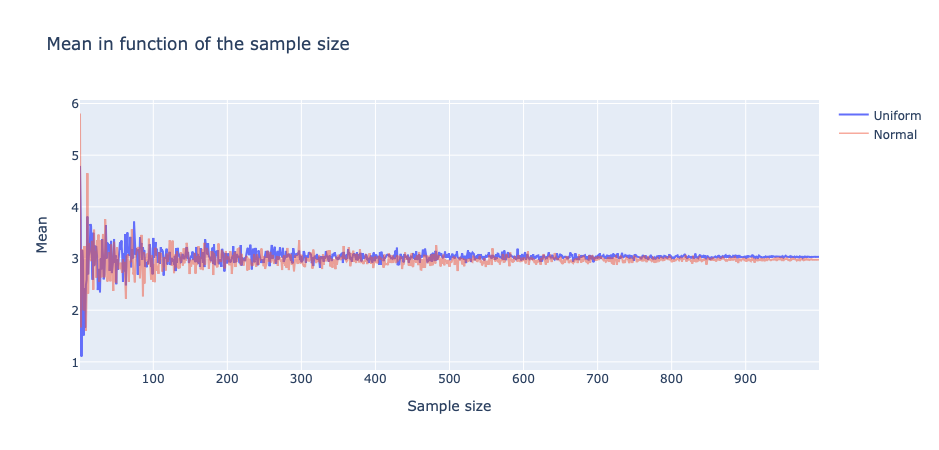

In [28]:
# Plot the kernel estimation of the returns for the two half of Credit Suisse (in 1 plot)
fig = go.Figure()
fig.add_trace(go.Scatter(x=result[:,4], y=result[:,0],
                    name='Uniform'))
fig.add_trace(go.Scatter(x=result[:,4], y=result[:,1], opacity=0.5, 
                    name='Normal'))

fig.update_layout(title = 'Mean in function of the sample size', xaxis_title = 'Sample size', yaxis_title = 'Mean')
fig.show()

## EXERCICE 3

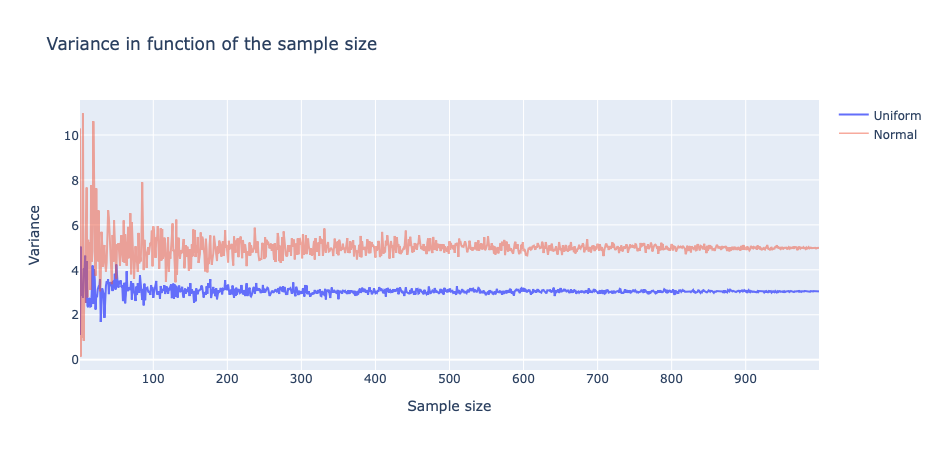

In [29]:
# Plot the kernel estimation of the returns for the two half of Credit Suisse (in 1 plot)
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=result[:,4], y=result[:,2],
                    name='Uniform'))
fig1.add_trace(go.Scatter(x=result[:,4], y=result[:,3], opacity=0.5, 
                    name='Normal'))

fig1.update_layout(title = 'Variance in function of the sample size', xaxis_title = 'Sample size', yaxis_title = 'Variance')
fig1.show()

# Central Limit Theorem
## EXERCICE 1

In [21]:
sample_uni = np.ones((100,1000))
for i in range(0, 100):
    sample_uni[i,:] = np.random.uniform(0, 6, 1000)

In [22]:
sample_size_uni = [20, 50, 100, 500, 1000]
mean_value_uni = np.ones((5,100))
for n in range(0, 5):
    for i in range(0, 100):
        mean_value_uni[n, i] = statistics.mean(np.random.choice(sample_uni[i], sample_size_uni[n], replace=False))

In [23]:
sample_norm = np.ones((100,1000))
for i in range(0, 100):
    sample_norm[i,:] = np.random.normal(3, math.sqrt(5), 1000)

In [24]:
sample_size_norm = [20, 50, 100, 500, 1000]
mean_value_norm = np.ones((5,100))
for n in range(0, 5):
    for i in range(0, 100):
        mean_value_norm[n, i] = statistics.mean(np.random.choice(sample_norm[i], sample_size_norm[n], replace=False))

## EXERCICE 2

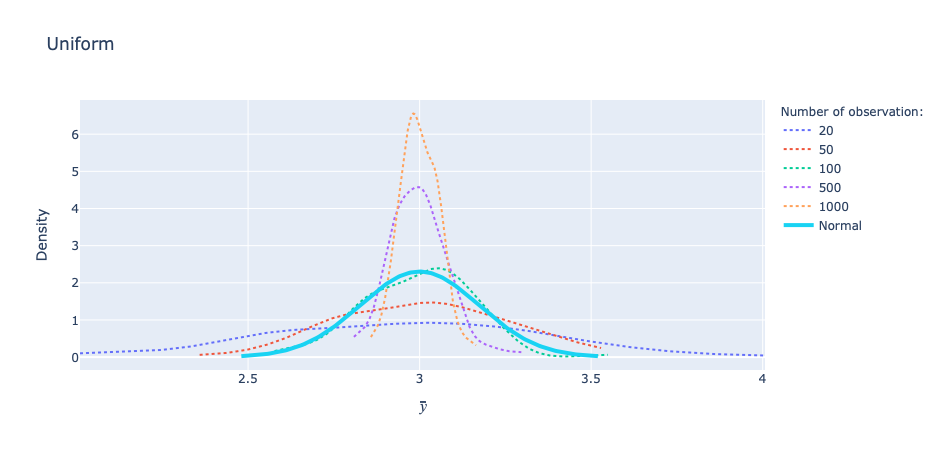

In [49]:
sample_size_uni = ['20', '50', '100', '500', '1000']
fig2 = go.Figure()

for i in range(0, 5):
    obs = mean_value_uni[i].reshape(len(mean_value_uni[i]), 1)
    kernel_points = np.linspace(min(mean_value_uni[i]), max(mean_value_uni[i]), 300).reshape(300,1)
    x = np.linspace(min(mean_value_uni[i]), max(mean_value_uni[i]), 300)
    bandwidth = np.sqrt(statistics.variance(mean_value_uni[i]))*len(mean_value_uni[i])**(-1/5)
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(obs)
    log_dens = kde.score_samples(kernel_points)
    y = np.exp(log_dens)
    fig2.add_trace(go.Scatter(x=x, y=y,
                    name=sample_size_uni[i], line = dict(dash = 'dot')))
    
# Compute the normal pdf parameterized with the returns for Credit Suisse (mean and sigma of the returns)
mu_hat = 3
sigma_hat = math.sqrt(3)/10
x = np.linspace(mu_hat - 3*sigma_hat, mu_hat + 3*sigma_hat, 300)
y = norm.pdf(x, mu_hat, sigma_hat)
fig2.add_trace(go.Scatter(x=x, y=y,
                    name='Normal', line = dict(width=4)))

fig2.update_layout(title = 'Uniform', xaxis_title = r'$\bar{y}$', yaxis_title = 'Density', legend_title_text='Number of observation:')

fig2.show()

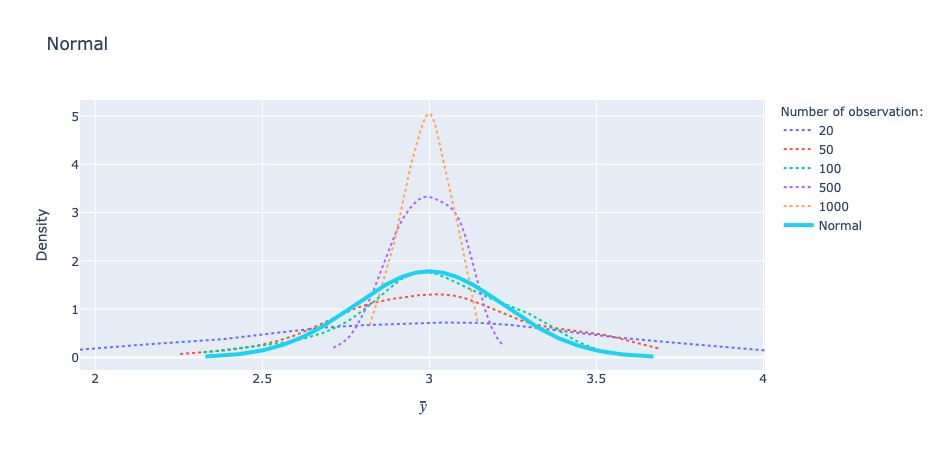

In [51]:
sample_size_norm = ['20', '50', '100', '500', '1000']
fig3 = go.Figure()

for i in range(0, 5):
    obs = mean_value_norm[i].reshape(len(mean_value_norm[i]), 1)
    kernel_points = np.linspace(min(mean_value_norm[i]), max(mean_value_norm[i]), 300).reshape(300,1)
    x = np.linspace(min(mean_value_norm[i]), max(mean_value_norm[i]), 300)
    bandwidth = np.sqrt(statistics.variance(mean_value_norm[i]))*len(mean_value_norm[i])**(-1/5)
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(obs)
    log_dens = kde.score_samples(kernel_points)
    y = np.exp(log_dens)
    fig3.add_trace(go.Scatter(x=x, y=y,
                    name=sample_size_norm[i], line = dict(dash = 'dot')))
    
# Compute the normal pdf parameterized with the returns for Credit Suisse (mean and sigma of the returns)
mu_hat = 3
sigma_hat = math.sqrt(5)/10
x = np.linspace(mu_hat - 3*sigma_hat, mu_hat + 3*sigma_hat, 300)
y = norm.pdf(x, mu_hat, sigma_hat)
fig3.add_trace(go.Scatter(x=x, y=y,
                    name='Normal', line = dict(width=4)))    
    
fig3.update_layout(title = 'Normal', xaxis_title = r'$\bar{y}$', yaxis_title = 'Density', legend_title_text='Number of observation:')

fig3.show()